<a href="https://colab.research.google.com/github/Solarahamza/Menstruation-and-Dignity-in-Wartime-Sudan/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

sud = pd.read_csv("Translated New - Sheet1 (2).csv")
sud = sud.applymap(lambda x: x.lower() if isinstance(x, str) else x)
sud.head()

/tmp/ipython-input-4090960851.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sud = sud.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,Age,Educational,MaritalStatus,Employment,DisplacementStatus,Residence,Locality,State,Amenities,Residence Type (inside Sudan),...,Diagnosis,ManagementChallenges,Management Categories,ReceivedAid,AidType,AidSource,HealthEdu,EduFeedback,DignityImpact,Experience
0,25-34 years,university,single,yes,yes,inside sudan,middle,al qadarif,city,dorm,...,vaginitis/infection,"difficult access to private bathrooms, a safe ...",safe disposal & environmental hygiene,no,disposable pads,feminist organization,no,NaN,yes,there's nothing specific
1,25-34 years,university,married,yes,yes,inside sudan,atbara,river nile,city,we rented a house/apartment,...,contact dermatitis/irritation,"privacy, a safe disposal site for used cycle p...",safe disposal & environmental hygiene,no,NaN,NaN,no,NaN,yes,lack of privacy was the biggest obstacle i fac...
2,18-24 years,university,married,no,yes,inside sudan,al qadarif,al qadarif,city,we rented a house/apartment,...,vaginitis/infection,a safe disposal site for used cycle products,safe disposal & environmental hygiene,no,NaN,NaN,yes,useful,yes,problems with the high cost and scarcity of di...
3,25-34 years,other,married,no,yes,inside sudan,omdurman,khartoum,city,with one of our relatives,...,contact dermatitis/irritation,difficult access to private bathrooms,privacy & facility access,yes,"dignity bag (pads, soap, underwear)",refugee camp,yes,benefit from the advice provided.,yes,"i didn't feel safe. i was far from home, there..."
4,18-24 years,university,single,no,no,inside sudan,rabak,white nile,city,our owned house,...,vaginitis/infection,privacy,privacy & facility access,no,NaN,NaN,yes,there was very clear education about the dange...,i'm not sure,the only difficulty i faced during my period w...


In [ ]:
sud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            151 non-null    object
 1   Educational                    151 non-null    object
 2   MaritalStatus                  151 non-null    object
 3   Employment                     151 non-null    object
 4   DisplacementStatus             151 non-null    object
 5   Residence                      151 non-null    object
 6   Locality                       85 non-null     object
 7   State                          85 non-null     object
 8   Amenities                      85 non-null     object
 9   Residence Type (inside Sudan)  81 non-null     object
 10  DisplacementCountry            151 non-null    object
 11  Residence Type Outside Sudan   65 non-null     object
 12  ResidenceType                  146 non-null    object
 13  Resid

In [ ]:
sud['DignityImpact'].unique()

array(['yes', "i'm not sure", 'no'], dtype=object)

In [ ]:
for col in ['Diagnosis','ResidenceCategories','Management Categories','ProductRisk','HealthEdu']:
    print(col)
    print(sud[col].value_counts())
    print("\n")

Diagnosis
Diagnosis
vaginitis/infection              67
contact dermatitis/irritation    52
no symptoms                      32
Name: count, dtype: int64


ResidenceCategories
ResidenceCategories
hosted housing         72
stable housing         64
displacement / camp    15
Name: count, dtype: int64


Management Categories
Management Categories
safe disposal & environmental hygiene    65
privacy & facility access                50
water, hygiene & product availability    36
Name: count, dtype: int64


ProductRisk
ProductRisk
low risk     103
high risk     48
Name: count, dtype: int64


HealthEdu
HealthEdu
no     106
yes     45
Name: count, dtype: int64




In [ ]:
sud_model.nunique()

,0
const,1
Cost Barriers,2
Availability Barriers,2
Quality & Usability Barriers,2
HealthStatus,2
ResidenceCategories_hosted housing,2
ResidenceCategories_stable housing,2
Management Categories_safe disposal & environmental hygiene,2
"Management Categories_water, hygiene & product availability",2
ProductRisk_low risk,2


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# ---------------------------------------------
# OUTCOME VARIABLE
# ---------------------------------------------
sud['DignityImpact_binary'] = sud['DignityImpact'].map({
    'yes': 1,
    'no': 0,
    "i'm not sure": 0
}).fillna(0)

# ---------------------------------------------
# VARIABLES
# ---------------------------------------------
categorical_vars = [
    'ResidenceCategories',
    'Management Categories',
    'ProductRisk',
    'HealthEdu',
    'Diagnosis'
]

numeric_vars = [
    'Cost Barriers',
    'Availability Barriers',
    'Quality & Usability Barriers',
    'HealthStatus'
]

# ---------------------------------------------
# DUMMIES
# ---------------------------------------------
sud_dummies = pd.get_dummies(sud[categorical_vars], drop_first=True)

# MERGE INTO MODEL
sud_model = pd.concat([sud[numeric_vars], sud_dummies], axis=1)

# Convert bool → int
sud_model = sud_model.astype(float)

# ADD CONSTANT
sud_model = sm.add_constant(sud_model)

# ---------------------------------------------
# STEP 1 — REMOVE PERFECTLY CONSTANT COLUMNS
# ---------------------------------------------
constant_cols = [col for col in sud_model.columns if sud_model[col].nunique() <= 1]
if constant_cols:
    print("Dropping constant columns:", constant_cols)
    sud_model = sud_model.drop(columns=constant_cols)

# ---------------------------------------------
# STEP 2 — REMOVE MULTICOLLINEARITY (VARIANCE INFLATION FACTOR)
# ---------------------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drop_high_vif(df, thresh=10):
    dropped = True
    while dropped:
        dropped = False
        vif = pd.Series(
            [variance_inflation_factor(df.values, i)
             for i in range(df.shape[1])],
            index=df.columns
        )

        high_vif = vif[vif > thresh]
        if len(high_vif) > 0:
            col_to_drop = high_vif.index[0]
            print("Dropping high VIF column:", col_to_drop, "VIF =", high_vif[col_to_drop])
            df = df.drop(columns=[col_to_drop])
            dropped = True
    return df

sud_model_clean = drop_high_vif(sud_model)

# ---------------------------------------------
# STEP 3 — FIT LOGISTIC REGRESSION
# ---------------------------------------------
model = sm.Logit(sud['DignityImpact_binary'], sud_model_clean)
result = model.fit()

print(result.summary2())


Dropping constant columns: ['const']
Dropping high VIF column: Cost Barriers VIF = inf
Dropping high VIF column: HealthStatus VIF = 14.678747382595859
Optimization terminated successfully.
         Current function value: 0.551458
         Iterations 6
                                              Results: Logit
Model:                            Logit                            Method:                       MLE       
Dependent Variable:               DignityImpact_binary             Pseudo R-squared:             0.204     
Date:                             2025-12-06 19:05                 AIC:                          186.5403  
No. Observations:                 151                              BIC:                          216.7131  
Df Model:                         9                                Log-Likelihood:               -83.270   
Df Residuals:                     141                              LL-Null:                      -104.66   
Converged:                        1.00

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


✅ SUMMARY OF MAIN FINDINGS
1. Quality & Usability Barriers — significant negative association (p = 0.028)

Coef = –0.92 → Higher quality/usability problems reduce the odds that a woman feels her dignity was maintained.

Interpretation:

Women reporting more issues with product quality, comfort, or usability are significantly less likely to say their dignity was preserved.

2. Health Education (Yes) — significant positive association (p = 0.040)

Coef = +0.85 → Having menstrual health education increases the odds of dignity impact.

Interpretation:

Women who received menstrual health education are more likely to report that their dignity was preserved.

3. Diagnosis: Vaginitis/Infection — highly significant positive association (p < 0.001)

Coef = +1.77 → Women currently experiencing infection symptoms have much higher odds of reporting dignity impact.

Interpretation is tricky:

Could mean women with symptoms are more aware of needs and protections.

Or they feel more vulnerable and therefore value supportive conditions more.

It does NOT imply infection improves dignity — it means their experiences make dignity impacts more strongly felt or reported.

AUC: 0.7936842105263159


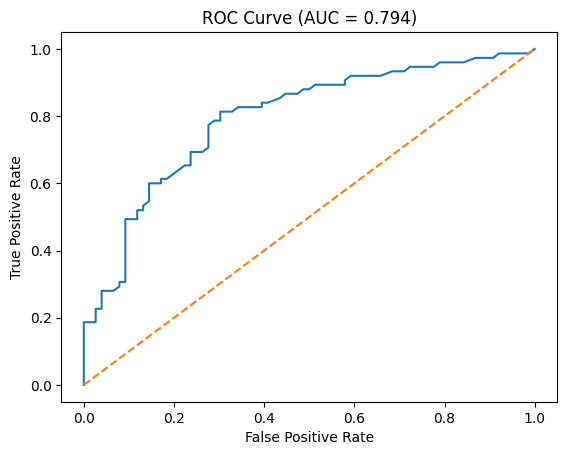

In [ ]:
# ---------------------------------------------
# STEP 4 — CALCULATE AUC (ROC Curve)
# ---------------------------------------------
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities from the model
y_pred_prob = result.predict(sud_model_clean)

# True labels
y_true = sud['DignityImpact_binary']

# Compute AUC
auc = roc_auc_score(y_true, y_pred_prob)
print("AUC:", auc)

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# OPTIONAL: If you want to plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = %.3f)" % auc)
plt.show()
